# SFR vs other quantities
---------------------------------------

We want to understand how the dynamics of the clusters impact on the star formation rate. In particular, how the infall population changes over time. 

In [2]:
from file_loc import FileLocs
from utils import gaussian_kde

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [4]:
fl = FileLocs()
galaxy_file = fl.gal_fname1
# galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [5]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groups_deCarvalho2017_galaxies_final_flag_johnnyheq_volumeLimited_v1.csv



In [6]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [7]:
cat

<Table length=319>
 Yang    RA      DEC      z    logM200   R200   N200
int64 float64  float64 float64 float64 float64 int64
----- -------- ------- ------- ------- ------- -----
    2 240.5602 16.1113   0.036   15.29    2.01   525
    4 247.1149 40.8317    0.03   14.66    1.24   217
    5 247.1633 39.4674    0.03   14.81     1.4   277
    6 167.6936 28.5374   0.033    14.6    1.18   167
    7 351.1194 14.6251   0.042   14.51     1.1   106
    8 239.5372 27.3133    0.09    15.1    1.71   183
    9 241.5673 18.1483   0.038   14.48    1.08   143
   10 223.2712  16.724   0.045   14.22    0.89   106
   11  10.4693 -9.3997   0.056   14.96    1.55   156
   12   14.206  -0.746   0.044   14.54    1.13    95
  ...      ...     ...     ...     ...     ...   ...
  616 172.1451 26.8291   0.053   14.15    0.84    28
  621 215.2345  17.666   0.051   14.21    0.87    35
  624 129.0212 52.7156   0.044   14.16    0.85    20
  625 242.3892 53.0522   0.063    14.3    0.93    22
  628 325.7397 -6.8996   0.054   14.34    0.96    40
  630 167.5969  4.8471    0.03    13.7     0.6    21
  631  119.635 37.7935   0.041   13.89    0.69    28
  635 203.2348  60.119   0.072   14.54    1.12    30
  664 208.4432 33.1695    0.05   14.26    0.91    29
  665 205.9073 30.0654    0.04    15.0    1.61    83

In [8]:
gal0

<Table length=71336>
 Yang        objid             specobjid      ...    Pcigar    TType     PS0   
int64        int64               int64        ...   float64   float64  float64 
----- ------------------- ------------------- ... ----------- -------- --------
    2 1237665371723530461 2476009810579974144 ...  0.00218124  0.21357 0.844609
    2 1237665371723595947 2476012009603229696 ...    0.965883  4.13005 0.997373
    2 1237665371723661557 2477083489036429312 ...    0.999787  0.42192 0.999222
    2 1237665371723726943 2477091735373637632 ...   0.0322638  5.21621 0.989868
    2 1237665428645150969 2445455493263550464 ...  0.00205122  3.56692 0.994657
    2 1237665428645216628 2475963631091607552 ...    0.989634  1.52224 0.921552
    2 1237665429182284038 2475976275475326976 ...    0.999911  2.78207 0.767894
    2 1237665429182349368 2476001564242765824 ...    0.999182  5.11824 0.919142
    2 1237665429182349548 2476000739609044992 ...    0.318073  2.47361 0.998968
    2 1237665429182349595 2476001289364858880 ...  0.00160922  3.29191 0.993778
  ...                 ...                 ... ...         ...      ...      ...
  628 1237680241435279624 1325295563284965376 ...   0.0234526  -2.0697 0.858679
  628 1237680241435345122 1325305733767522304 ... 0.000342259 -1.20104 0.831503
  628 1237680241435410662 1325307657912870912 ...    0.985676 -0.22303 0.929291
  628 1237680241435476258 1325329373267519488 ... 0.000212862 -2.16799 0.707497
  628 1237680241435476267 1325329098389612544 ...    0.229453 -1.28813 0.854628
  628 1237680241435672755 1326420913452771328 ...    0.467358  0.77226 0.981489
  628 1237680241435672996 1325353012767516672 ...  0.00217021 -0.63698 0.214328
  628 1237680241435738283 1326422562720212992 ...     0.99972  5.41901 0.214295
  628 1237680241435738375 1326431358813235200 ... 0.000325852 -2.32409 0.755354
  628 1237680241435738482 1326433557836490752 ...  0.00135199 -2.09417 0.892448

# Mask Data
---------------------

In [9]:
mask = np.abs(gal0['vlosn'])<5.
mask&= gal0['ssfr']>-20

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 35274
fraction: 0.49


In [10]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [10]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

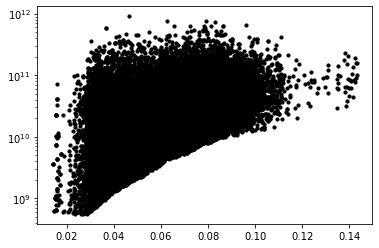

In [11]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

# Phase Space Analysis
---------------------------------------


In [12]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])

rn = np.array(gal['Rn'])
t_infall = np.array(gal['t_infall'])/1e9
morph_type = np.array(gal['TType'])

ssfr = np.array(gal['ssfr'])
Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

In [13]:
from utils import check_non_valid_number
Psp   = np.where(gal['TType'] > 0, 1, 0).astype(int)
Pell  = np.where(gal['TType'] <=0, 1, 0).astype(int)
Ps0   = check_non_valid_number(gal['PS0'])
Ps0[np.isnan(Ps0)] = 0.
Ps0[gal['TType'] > 0] = 0.


## Stellar Mass

In [14]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [17]:
# grid
xmin, xmax = 9., 12.0
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=22)

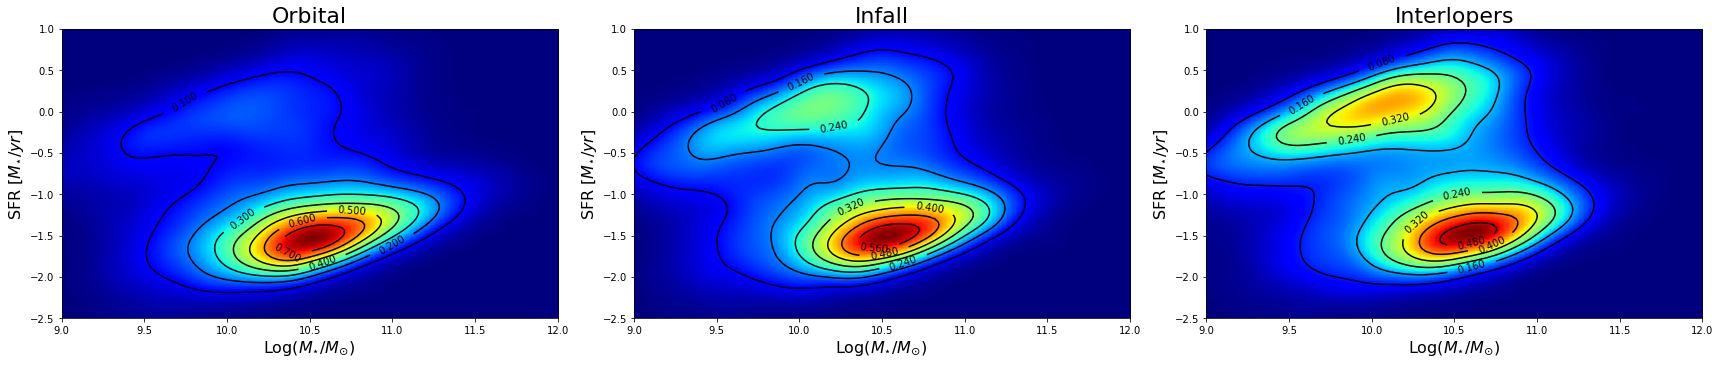

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRmass(mass,sfr,Po,ax=axis[0],title='Orbital')
SFRmass(mass,sfr,Pi,ax=axis[1],title='Infall')
SFRmass(mass,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

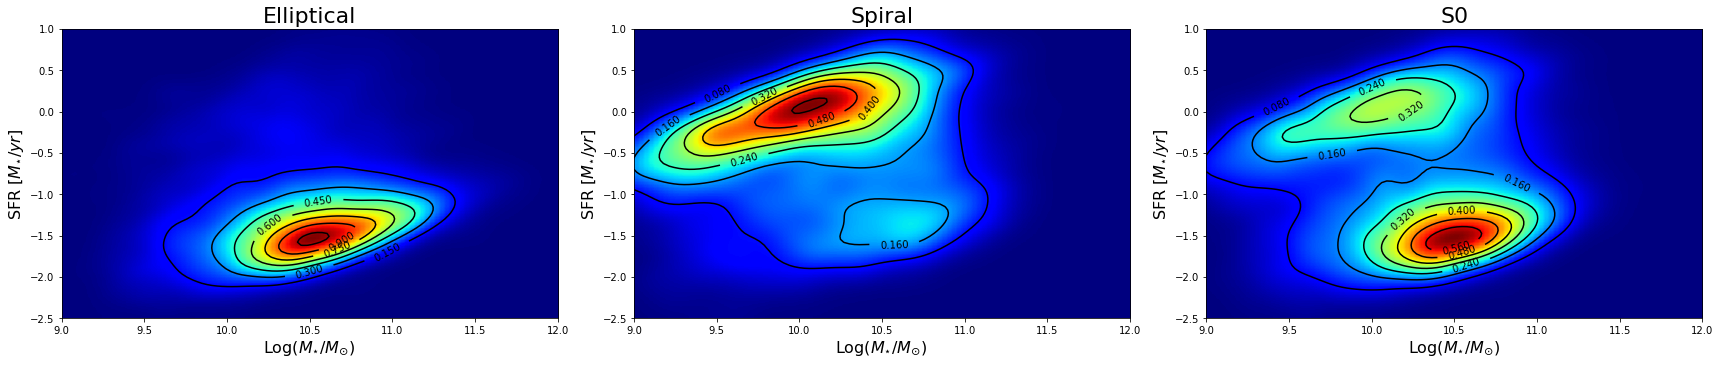

In [115]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRmass(mass,sfr,Pell,ax=axis[0],title='Elliptical')
SFRmass(mass,sfr,Psp,ax=axis[1],title='Spiral')
SFRmass(mass,sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_smass.png',facecolor='w', transparent=False,dpi=150)

## Radii

In [123]:
radii_label = r'$ R / R_{200}$'

In [124]:
# grid
xmin, xmax = 0., 3.
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 120)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRradii(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(radii_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=22)

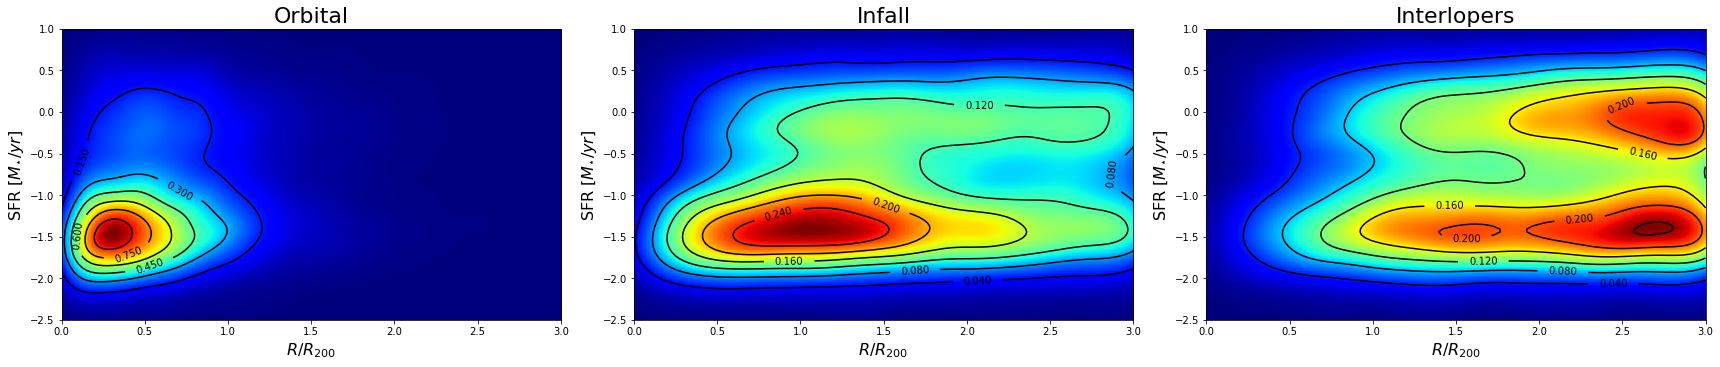

In [125]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRradii(rn,sfr,Po,ax=axis[0],title='Orbital')
SFRradii(rn,sfr,Pi,ax=axis[1],title='Infall')
SFRradii(rn,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

In [96]:
from utils import check_non_valid_number

In [102]:
Psp   = np.where(gal['TType'] > 0, 1, 0).astype(int)
Pell  = np.where(gal['TType'] <=0, 1, 0).astype(int)
Ps0   = check_non_valid_number(gal['PS0'])
Ps0[np.isnan(Ps0)] = 0.

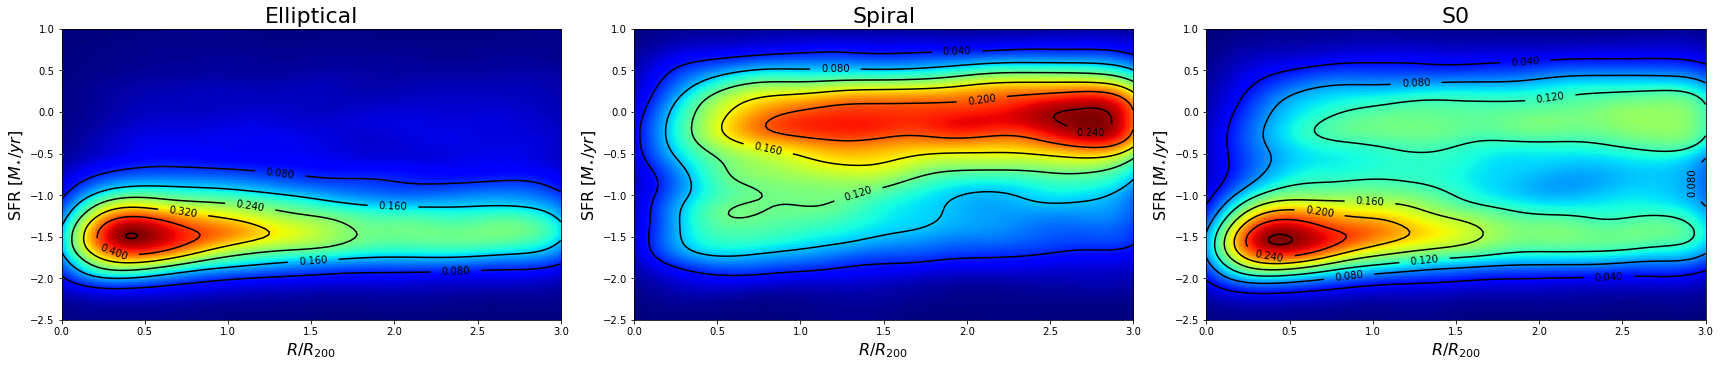

In [108]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRradii(rn,sfr,Pell,ax=axis[0],title='Elliptical')
SFRradii(rn,sfr,Psp,ax=axis[1],title='Spiral')
SFRradii(rn,sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

## Free Fall Time

In [126]:
free_fall_label = r'$Log(t_{free-fall}/Gyr) $'

In [127]:
# grid
xmin, xmax = 10**8.2/1e9/2., 10**11.2/1e9/2.
xmin, xmax = np.log10(xmin), np.log10(xmax)
ymin, ymax = -2.5, 1.0
x = np.log10(np.logspace(8.2,11.2,100)/1e9/2.)   #infall time
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRff(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
#     cset = ax.contour(xx, yy, f, colors='k')
#     ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(free_fall_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    #ax.set_xscale('log')
    if title is not None:
        ax.set_title(title,fontsize=22)

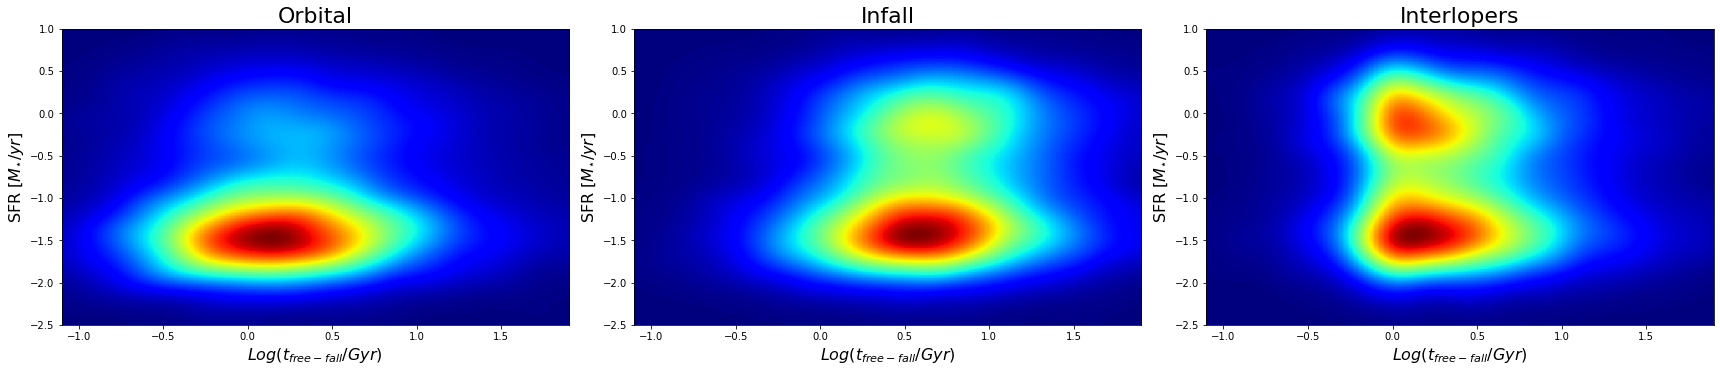

In [128]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Po,ax=axis[0],title='Orbital')
SFRff(np.log10(t_infall),sfr,Pi,ax=axis[1],title='Infall')
SFRff(np.log10(t_infall),sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_free_fall_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

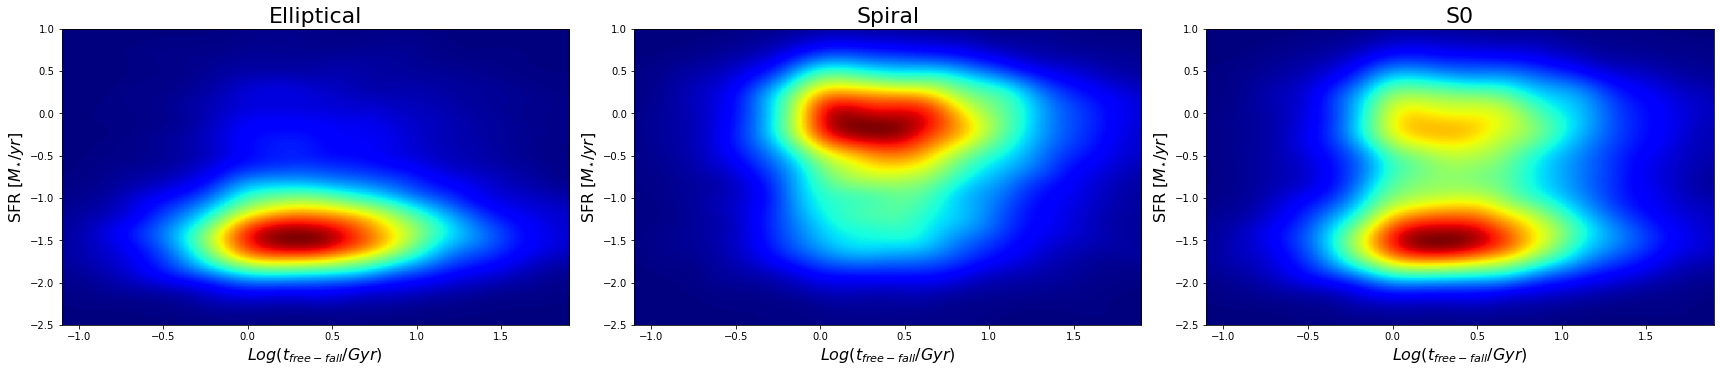

In [111]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Pell,ax=axis[0],title='Elliptical')
SFRff(np.log10(t_infall),sfr,Psp,ax=axis[1],title='Spiral')
SFRff(np.log10(t_infall),sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_free_fall.png',facecolor='w', transparent=False,dpi=150)

In [40]:
mask = rn>3.
print(Pn[mask])

[0.96 1.   0.99 ... 0.45 0.36 0.19]


## Morphological Type

In [120]:
morph_label = r'TType'

In [121]:
# grid
xmin, xmax = -3., 7.
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRmorph(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=2.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(morph_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    
    if title is not None:
        ax.set_title(title,fontsize=22)

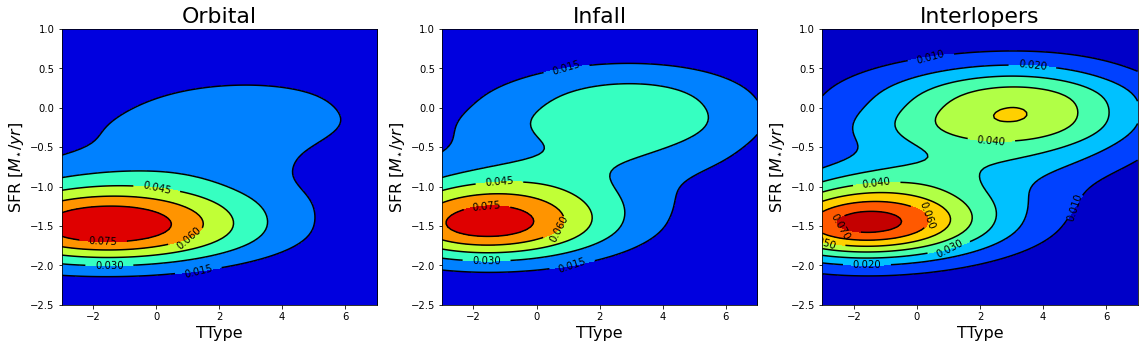

In [122]:
fig, axis = plt.subplots(1, 3, figsize=(16,8))
SFRmorph(morph_type,sfr,Po,ax=axis[0],title='Orbital')
SFRmorph(morph_type,sfr,Pi,ax=axis[1],title='Infall')
SFRmorph(morph_type,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morph_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

# sSFR

In [24]:
# grid
xmin, xmax = 9., 12.0
ymin, ymax = -13.25, -8.75
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

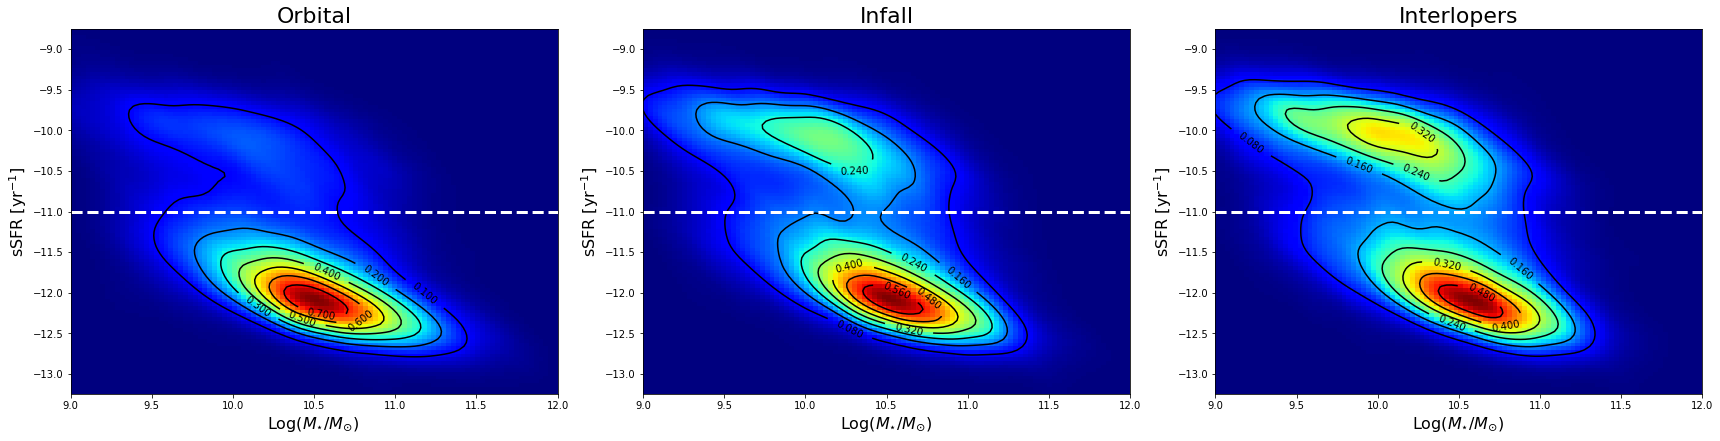

In [146]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRmass(mass,ssfr,Po,ax=axis[0],title='Orbital')
sSFRmass(mass,ssfr,Pi,ax=axis[1],title='Infall')
sSFRmass(mass,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

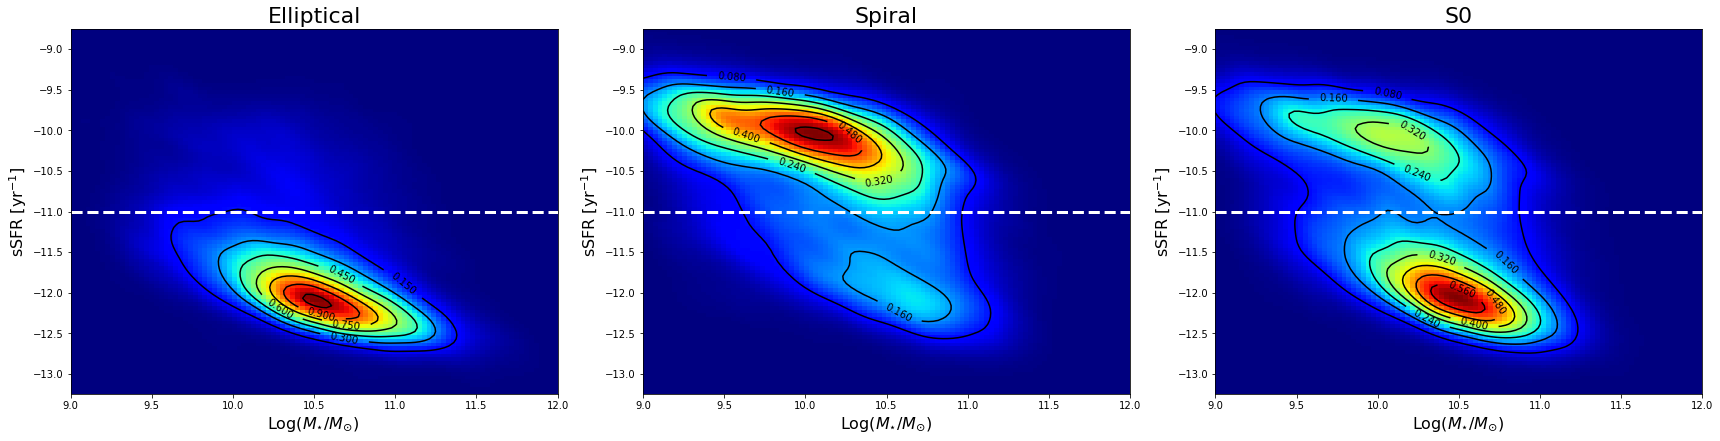

In [148]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRmass(mass,ssfr,Pell,ax=axis[0],title='Elliptical')
sSFRmass(mass,ssfr,Psp,ax=axis[1],title='Spiral')
sSFRmass(mass,ssfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morphological_transformation_smass.png',facecolor='w', transparent=False,dpi=150)

## Radii

In [19]:
radii_label = r'$ R / R_{200}$'

In [26]:
# grid
xmin, xmax = 0., 3.
ymin, ymax = -13.25, -8.75
x = np.linspace(xmin, xmax, 120)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRradii(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(radii_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

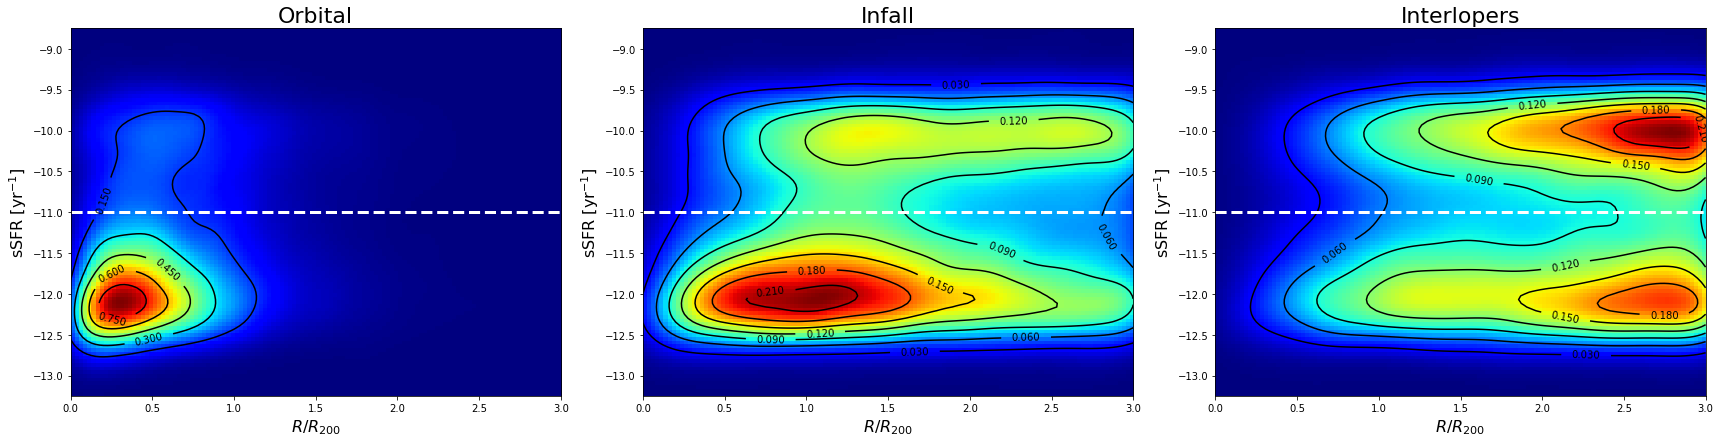

In [36]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Po,ax=axis[0],title='Orbital')
sSFRradii(rn,ssfr,Pi,ax=axis[1],title='Infall')
sSFRradii(rn,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

In [30]:
# # grid
# xmin, xmax = 0., 3.
# ymin, ymax = -3, 8.0
# x = np.linspace(xmin, xmax, 120)  # kde resolution
# y = np.linspace(ymin, ymax, 100)  # kde resolution
# xx, yy = np.meshgrid(x, y)

# fig, axis = plt.subplots(1, 3, figsize=(24,6))
# sSFRradii(rn,morph_type,Po,ax=axis[0],title='Orbital')
# sSFRradii(rn,morph_type,Pi,ax=axis[1],title='Infall')
# sSFRradii(rn,morph_type,Pn,ax=axis[2],title='Interlopers')
# fig.subplots_adjust(wspace=0.2,hspace=0.05)
# fig.tight_layout()
# fig.savefig('../plots/ssfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

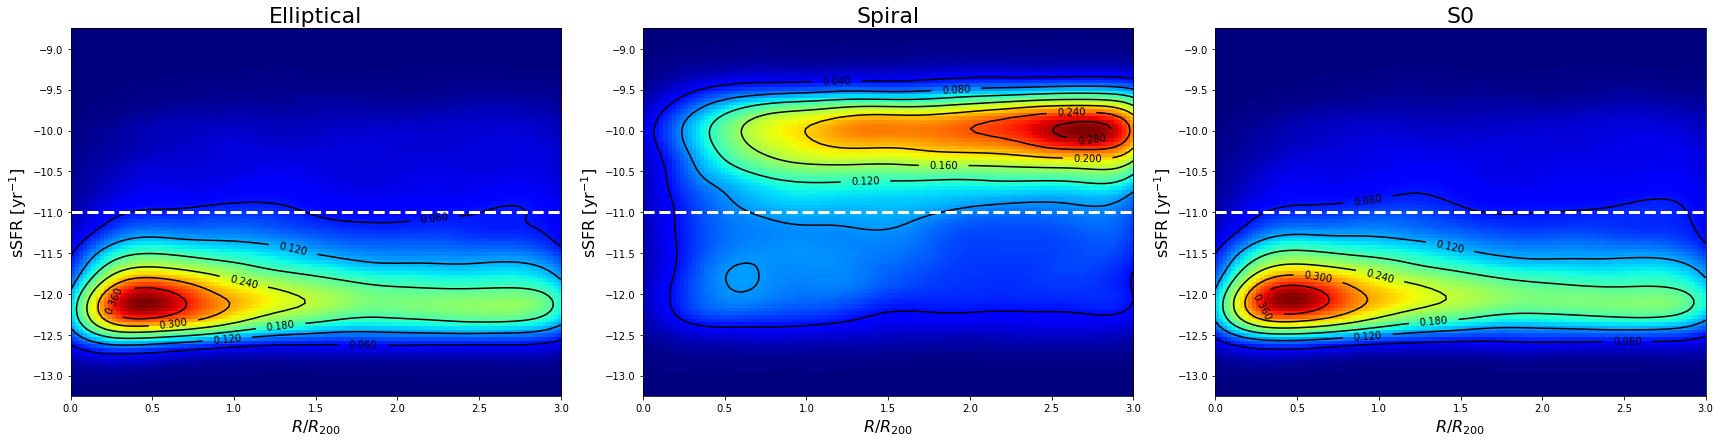

In [27]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Pell,ax=axis[0],title='Elliptical')
sSFRradii(rn,ssfr,Psp,ax=axis[1],title='Spiral')
sSFRradii(rn,ssfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

In [56]:
# Psf = np.array(gal['SF']).astype(int)
# Psf = np.array(gal['ssfr']>-11.).astype(int)
# Pco = np.array((gal['mg']-gal['mr'])<0.6).astype(int)

In [57]:
np.sum(Po*Psf)/np.sum(Po)

0.2618503935943964

In [58]:
np.sum(Po*Pco)/np.sum(Po)

0.1121250854611932

In [59]:
np.sum(Po*Psf*Psp)/np.sum(Po)

0.20521495685729804

In [60]:
np.sum(Psp*Po)/np.sum(Po)

0.33565913887545223

In [23]:
np.sum(Psp*Po*(1-Psf))/np.sum(Po)

0.13044418201815422

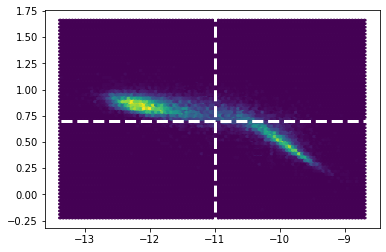

In [61]:
plt.hexbin(gal['ssfr'],gal['mg']-gal['mr'])
plt.axvline(-11.,ls='--',lw=3,color='w')
plt.axhline(0.7,ls='--',lw=3,color='w')
# plt.axhline(0.6,ls='--',lw=3,color='w')

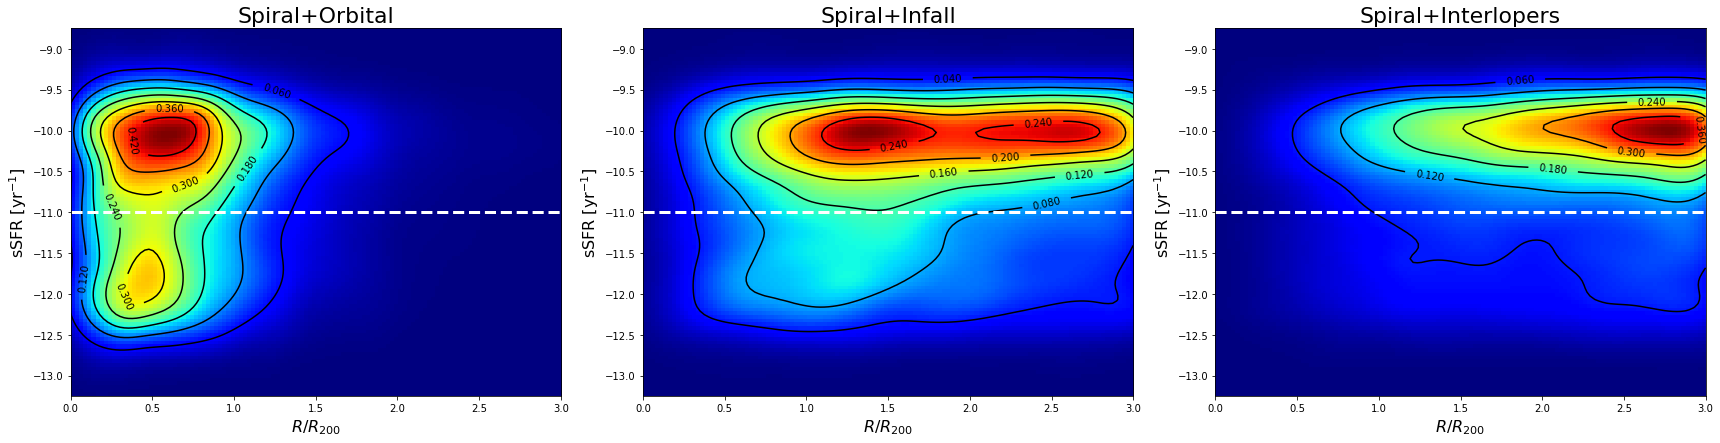

In [38]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Psp*Po,ax=axis[0],title='Spiral+Orbital')
sSFRradii(rn,ssfr,Psp*Pi,ax=axis[1],title='Spiral+Infall')
sSFRradii(rn,ssfr,Psp*Pn,ax=axis[2],title='Spiral+Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

(array([17385.,  1015.,   826.,   744.,   734.,   907.,  1370.,  2140.,
         4082.,  6071.]),
 array([0.       , 0.0999656, 0.1999312, 0.2998968, 0.3998624, 0.499828 ,
        0.5997936, 0.6997592, 0.7997248, 0.8996904, 0.999656 ]),
 <BarContainer object of 10 artists>)

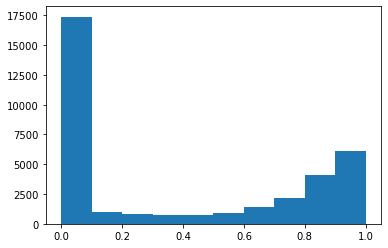

In [70]:
plt.hist(Ps0*Pell)

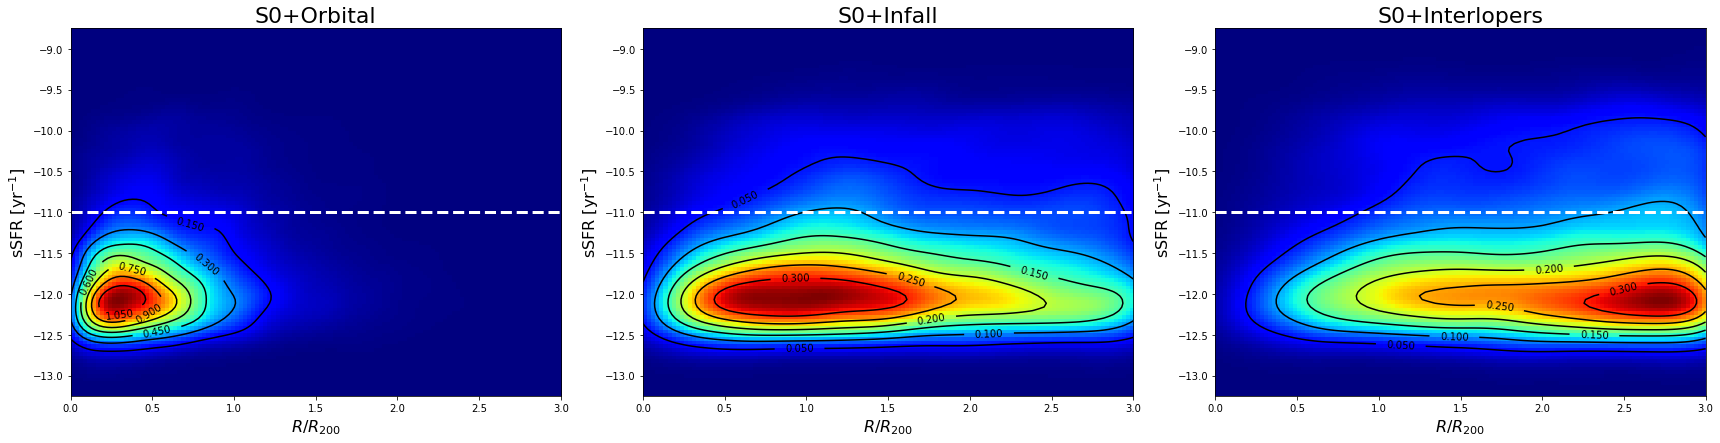

In [28]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Ps0*Po,ax=axis[0],title='S0+Orbital')
sSFRradii(rn,ssfr,Ps0*Pi,ax=axis[1],title='S0+Infall')
sSFRradii(rn,ssfr,Ps0*Pn,ax=axis[2],title='S0+Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

In [178]:
Pagn = np.array(gal['bpt']==4).astype(int)

In [181]:
Pmer = check_non_valid_number(np.array(gal['Pmerg']))
Pmer[np.isnan(Pmer)] = 0.

# Pmer = check_non_valid_number(np.array(gal['Pdisk']))
# Pmer[np.isnan(Pmer)] = 0.


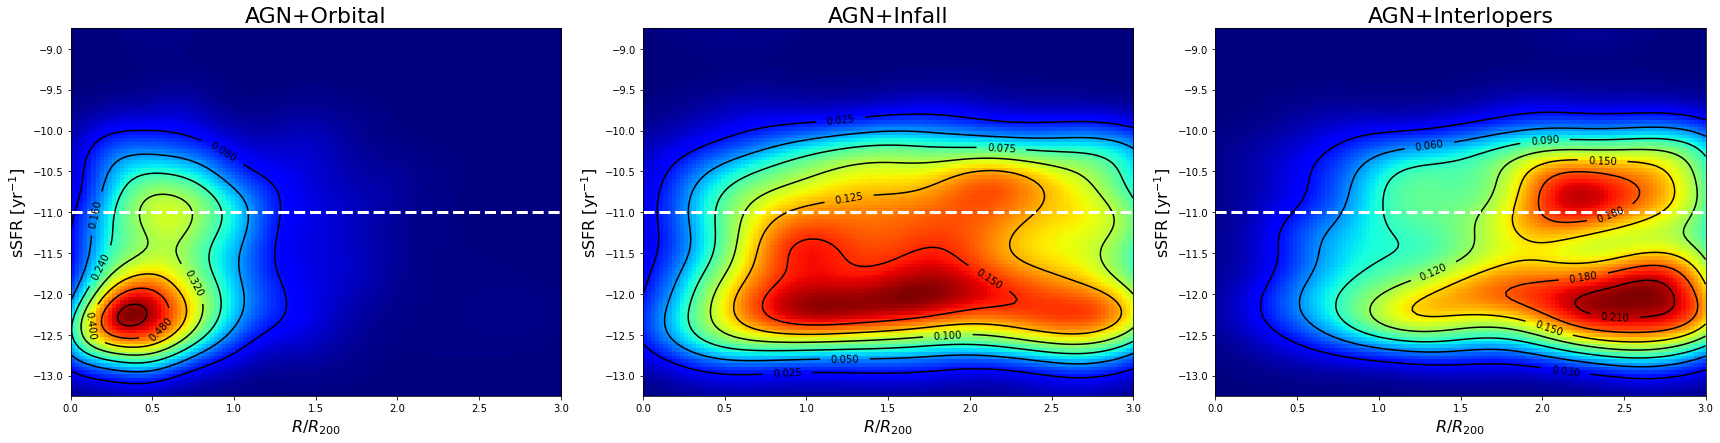

In [182]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Pagn*Po,ax=axis[0],title='AGN+Orbital')
sSFRradii(rn,ssfr,Pagn*Pi,ax=axis[1],title='AGN+Infall')
sSFRradii(rn,ssfr,Pagn*Pn,ax=axis[2],title='AGN+Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

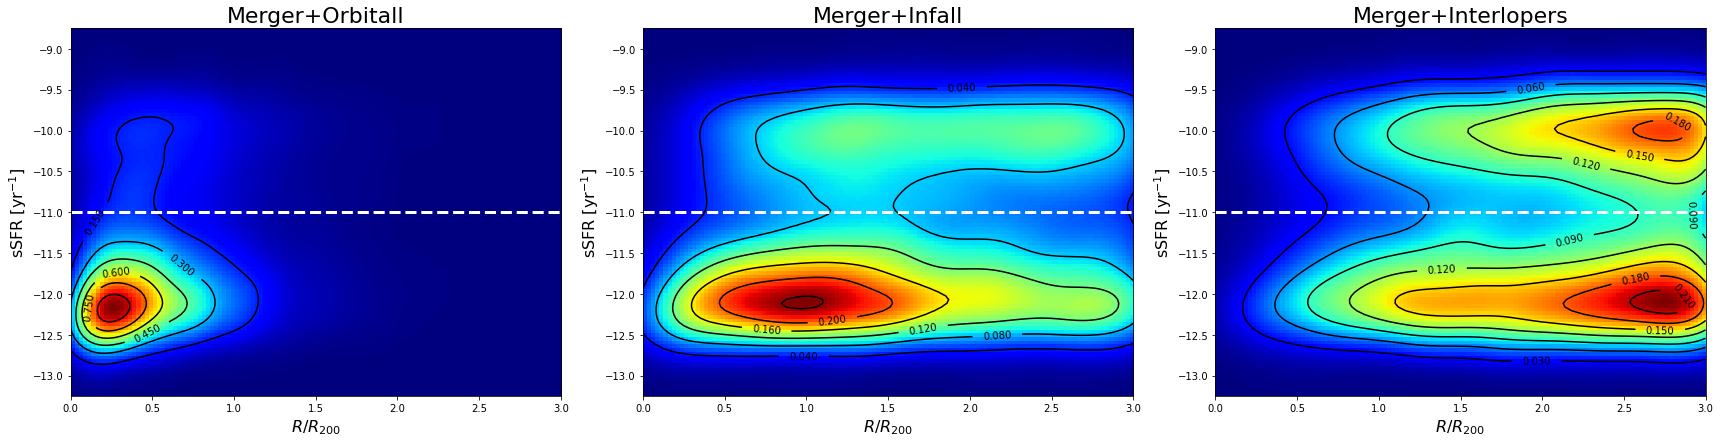

In [183]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Pmer*Po,ax=axis[0],title='Merger+Orbitall')
sSFRradii(rn,ssfr,Pmer*Pi,ax=axis[1],title='Merger+Infall')
sSFRradii(rn,ssfr,Pmer*Pn,ax=axis[2],title='Merger+Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

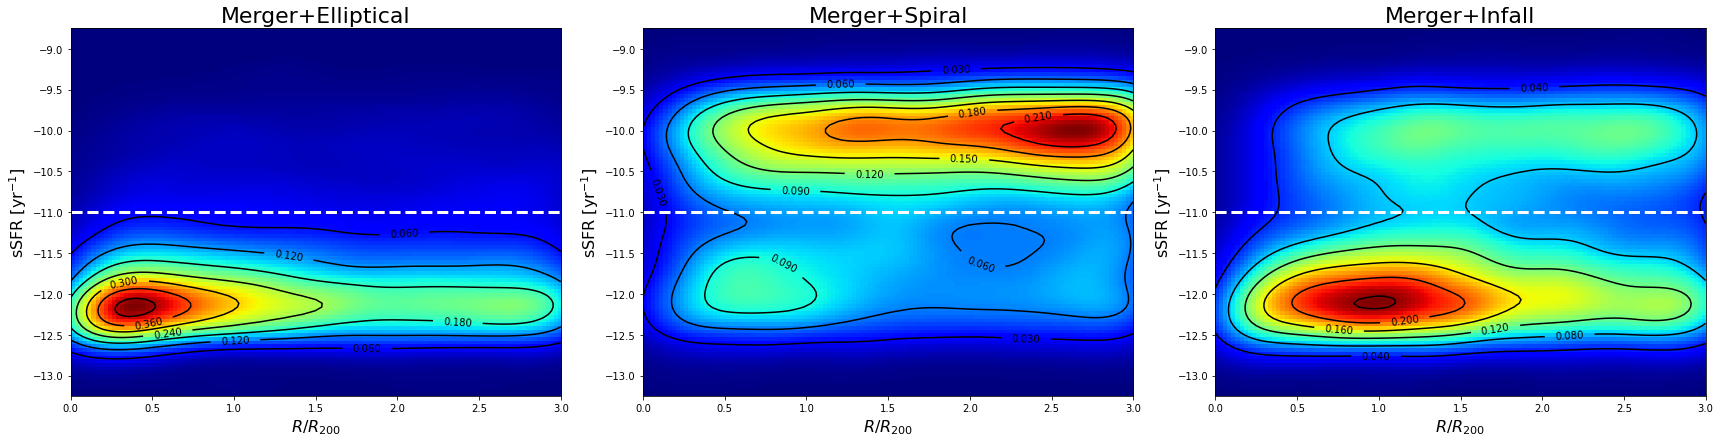

In [184]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Pmer*Pell,ax=axis[0],title='Merger+Elliptical')
sSFRradii(rn,ssfr,Pmer*Psp,ax=axis[1],title='Merger+Spiral')
sSFRradii(rn,ssfr,Pmer*Pi,ax=axis[2],title='Merger+Infall')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
# fig.savefig('../plots/ssfr_morphological_transformation.png',facecolor='w', transparent=False,dpi=150)

## Free Fall Time

In [126]:
free_fall_label = r'$Log(t_{free-fall}/Gyr) $'

In [127]:
# grid
xmin, xmax = 10**8.2/1e9/2., 10**11.2/1e9/2.
xmin, xmax = np.log10(xmin), np.log10(xmax)
ymin, ymax = -2.5, 1.0
x = np.log10(np.logspace(8.2,11.2,100)/1e9/2.)   #infall time
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRff(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
#     cset = ax.contour(xx, yy, f, colors='k')
#     ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(free_fall_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    #ax.set_xscale('log')
    if title is not None:
        ax.set_title(title,fontsize=22)

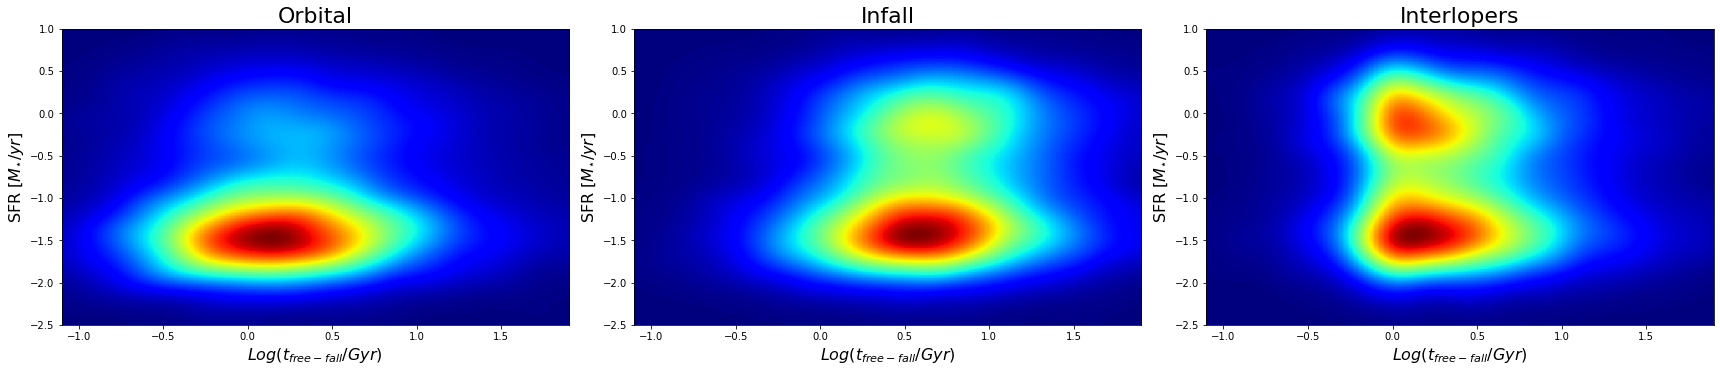

In [128]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Po,ax=axis[0],title='Orbital')
SFRff(np.log10(t_infall),sfr,Pi,ax=axis[1],title='Infall')
SFRff(np.log10(t_infall),sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_free_fall_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

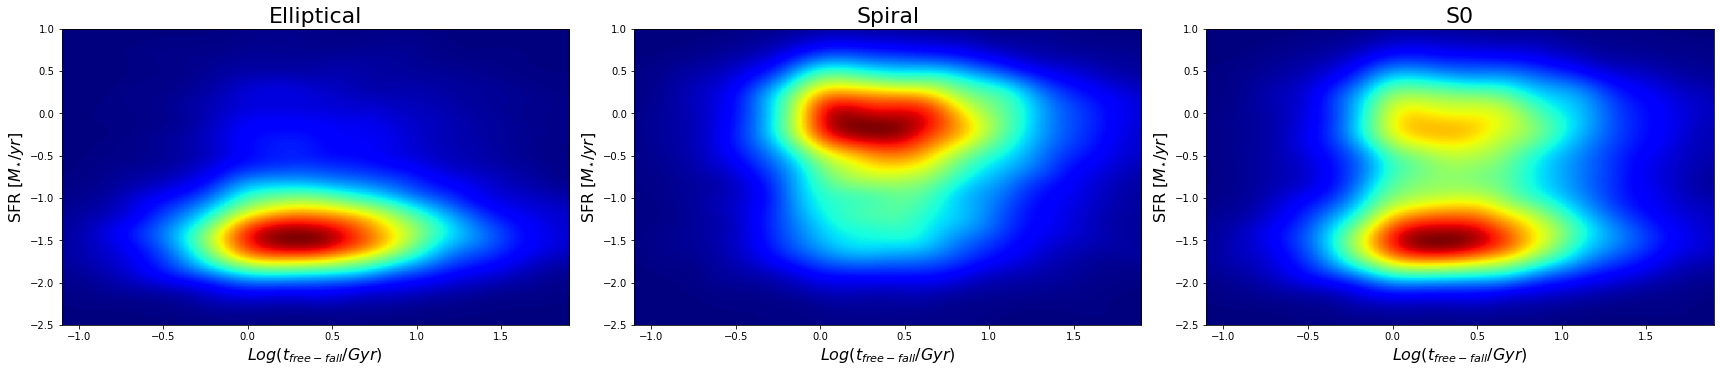

In [111]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Pell,ax=axis[0],title='Elliptical')
SFRff(np.log10(t_infall),sfr,Psp,ax=axis[1],title='Spiral')
SFRff(np.log10(t_infall),sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_free_fall.png',facecolor='w', transparent=False,dpi=150)

## Morphological Type

In [120]:
morph_label = r'TType'

In [153]:
# grid
xmin, xmax = -3., 7.
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmorph(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=2.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(morph_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    
    if title is not None:
        ax.set_title(title,fontsize=22)

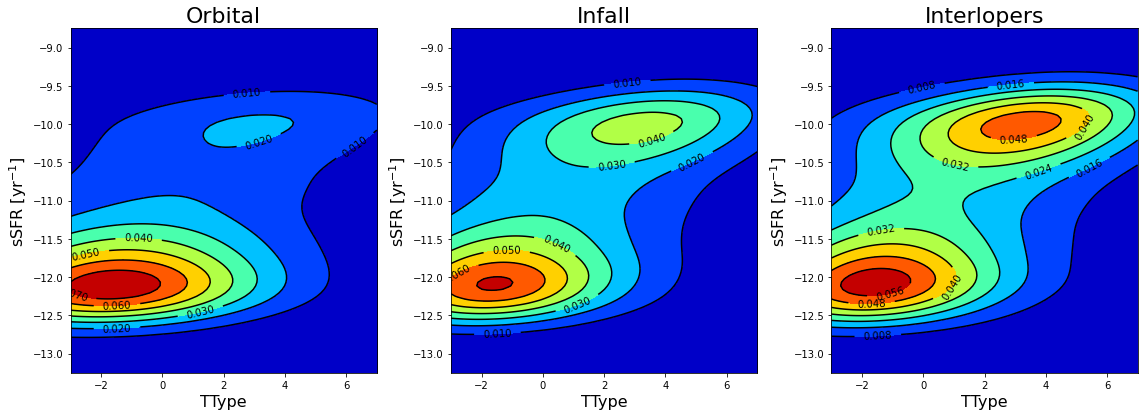

In [155]:
fig, axis = plt.subplots(1, 3, figsize=(16,6))
sSFRmorph(morph_type,ssfr,Po,ax=axis[0],title='Orbital')
sSFRmorph(morph_type,ssfr,Pi,ax=axis[1],title='Infall')
sSFRmorph(morph_type,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morph_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)